## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [849]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [850]:
data = pd.read_csv('german_credit.csv')

In [851]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [852]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [853]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

В таблице 21 колонка, из них 3 числовые и 18 не числовые.

In [854]:
for col in data.columns:
    print(col.upper(), end=" ")
    if len(data[f'{col}'].unique()) >= 20:  # если количество уникальных элементов больше 20, то выводим первые 20 эл, иначе только уникальные
        print(f"data: {data[f'{col}'].values[:20]}")
    else:
        print(f"unique elements: {data[f'{col}'].unique()}")
    print()

STATUS unique elements: ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']

DURATION data: [18  9 12 12 12 10  8  6 18 24 11 30  6 48 18  6 11 18 36 11]

CREDIT_HISTORY unique elements: ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']

PURPOSE unique elements: ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']

AMOUNT data: [1049 2799  841 2122 2171 2241 3398 1361 1098 3758 3905 6187 1957 7582
 1936 2647 3939 3213 2337 7228]

SAVINGS unique elements: ['unknown/no savings account' '... <  100 DM' '100 <= ... <  500 DM'
 '... >= 1000 DM' '500 <= ... < 1000 DM']

EMPLOYMENT_DURATION unique elements: ['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs']

INSTALLMENT_

количественные: duration amount age 

категориальные: credit_history purpose personal_status_sex other_debtors property other_installment_plans housing job (или порядковый)

бинарные: credit_rist foreign_worker telephone people_liable

порядковые: status employment_duration savings present_residence number_credits installment_rate


C бинарными признаками будет удобно работать, если мы их заменим:

In [855]:
data = data.replace({'foreign_worker': {'yes': 1, 'no': 0}})
data = data.replace({'telephone': {'no': 0, 'yes (under customer name)': 1}})

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [856]:
data.groupby(['purpose']).mean().amount

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [857]:
data.housing.unique()

array(['for free', 'rent', 'own'], dtype=object)

In [858]:
# Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)?
cond_age = data.age < 30
cond_house = data.housing == 'rent'
len(data[cond_age & cond_house]) / len(data[cond_age])

0.6666666666666666

In [859]:
# А какой процент клиентов старше 40 лет снимает жилье?
cond_age = data.age > 40
len(data[cond_age & cond_house]) / len(data[cond_age])

0.6801470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [860]:
data.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [861]:
cond_credits = (data.number_credits == '4-5') | (data.number_credits == '>= 6')
len(data[(data.foreign_worker == 1) & cond_credits])

1

### Задание 6 (1 балл)

In [862]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 12})

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

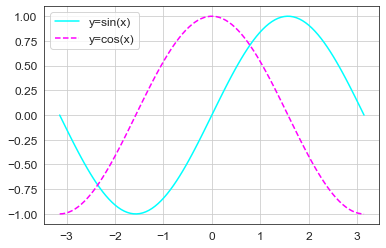

In [863]:
x = np.linspace(-np.pi, np.pi, 100)

plt.plot(x, np.sin(x), color='cyan', label='y=sin(x)')
plt.plot(x, np.cos(x), color='magenta', linestyle='--', label='y=cos(x)')

plt.legend()
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [864]:
good_labels, good_counts = np.unique(data[data['credit_risk'] == 'good'].status, return_counts=True)
bad_labels, bad_counts = np.unique(data[data['credit_risk'] == 'bad'].status, return_counts=True)

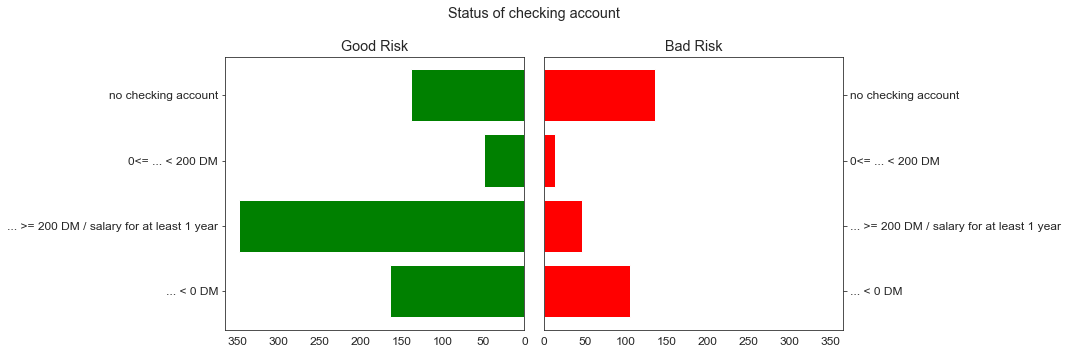

In [865]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].barh(y=good_labels, width=good_counts, color='green')
axes[1].barh(y=bad_labels, width=bad_counts , color='red')

axes[1].set(title="Bad Risk", xlim=axes[0].get_xlim())
axes[0].set(title="Good Risk", xlim=axes[0].get_xlim()[::-1])

axes[0].yaxis.tick_left()
axes[1].yaxis.tick_right()

fig.suptitle("Status of checking account")
fig.tight_layout()
plt.show()

### Задание 8  (0.5 балла)

In [866]:
import seaborn as sns
sns.set_style('white')

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

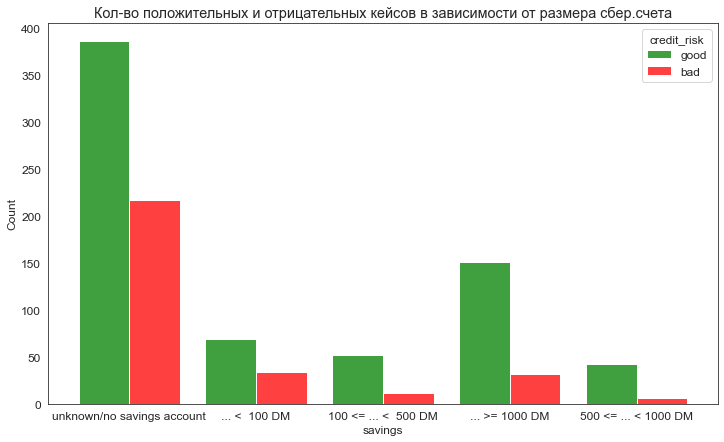

In [867]:
plt.figure(figsize=(12, 7))
ax = sns.histplot(data=data, x='savings', hue='credit_risk', multiple="dodge", shrink=0.8, palette=['green', 'red'])

plt.title('Кол-во положительных и отрицательных кейсов в зависимости от размера сбер.счета')
plt.show()

Намного проще и понятнее вариант с seaborn. Первый график можно использовать для красоты, он выглядит достаточно необычно, но не для анализа.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

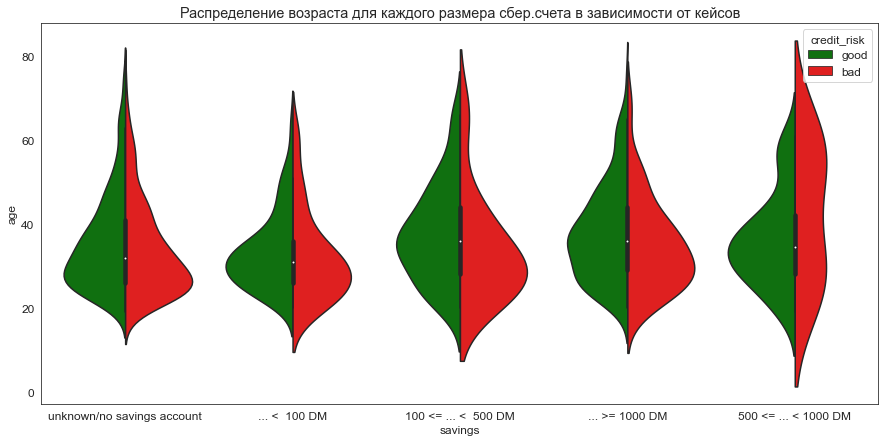

In [868]:
plt.figure(figsize=(15, 7))
ax = sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', split=True, palette=['green', 'red'])

plt.title('Распределение возраста для каждого размера сбер.счета в зависимости от кейсов')
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

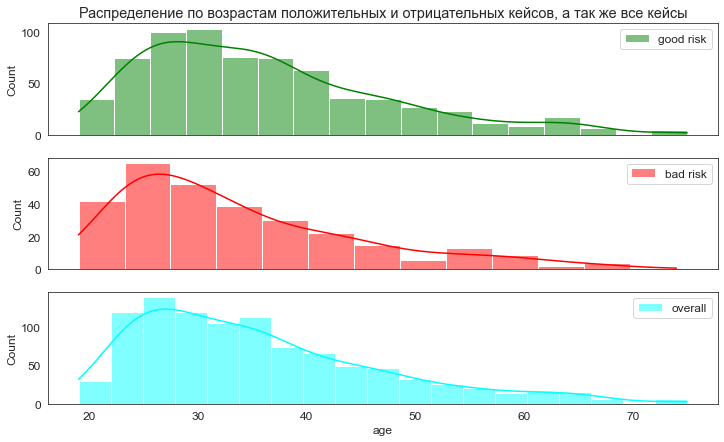

In [869]:
fig, axes = plt.subplots(3, 1, figsize=(12, 7), sharex=True)

axes[0].set_title("Распределение по возрастам положительных и отрицательных кейсов, а так же все кейсы")

sns.histplot(ax=axes[0], kde=True, data=data[data['credit_risk'] == 'good'], x='age', color='green', label='good risk')
axes[0].legend(loc="upper right")

sns.histplot(ax=axes[1], kde=True, data=data[data['credit_risk'] == 'bad'], x='age', color='red', label='bad risk')
axes[1].legend(loc="upper right")

sns.histplot(ax=axes[2], kde=True, data=data, x='age', color='cyan', label='overall')
axes[2].legend(loc="upper right")

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

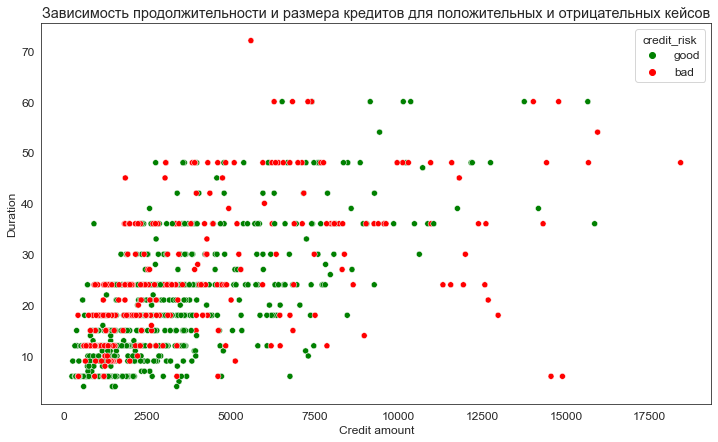

In [870]:
plt.figure(figsize=(12, 7))

sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk', palette=['green', 'red'])
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.title("Зависимость продолжительности и размера кредитов для положительных и отрицательных кейсов")
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [871]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

Text(0.5, 0, 'Age')

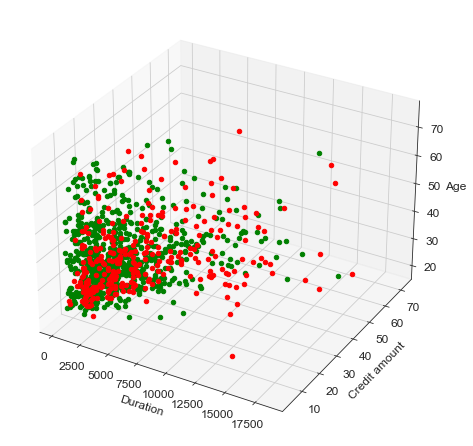

In [872]:
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc1 = ax.scatter(data=data[data['credit_risk'] =='good'], ys='duration', xs='amount', zs='age', c='green', depthshade=False, marker='o')
sc = ax.scatter(data=data[data['credit_risk'] == 'bad'], ys='duration', xs='amount', zs='age', c='red',  depthshade=False, marker='o')
ax.set_xlabel('Duration')
ax.set_ylabel('Credit amount')
ax.set_zlabel('Age')


### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [873]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

количественные: duration amount age 

категориальные: credit_history purpose personal_status_sex other_debtors property other_installment_plans housing job (или порядковый)

бинарные: credit_rist foreign_worker telephone  people_liable

порядковые: status employment_duration savings present_residence number_credits installment_rate

In [874]:
data = data.replace({'foreign_worker': {'yes': 1, 'no': 0},
                    'telephone': {'no': 0, 'yes (under customer name)': 1},
                    'credit_risk': {'good': 1, 'bad': 0},
                    'people_liable': {'0 to 2': 0, '3 or more': 1}}
                    )

In [875]:
from sklearn.preprocessing import LabelEncoder

In [876]:
cat_col = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']
order_col = ['status', 'employment_duration', 'savings', 'present_residence', 'number_credits', 'installment_rate']

In [877]:
label = LabelEncoder()
for col in order_col:
    data[col + "_code"] = label.fit_transform(data[col])

In [878]:
data = data.drop(cat_col+order_col, axis=1)

In [733]:
data.head()

,duration,amount,age,telephone,foreign_worker,credit_risk,status_code,employment_duration_code,savings_code,present_residence_code,number_credits_code,installment_rate_code
0,18,1049,21,0,0,1,3,2,4,3,0,2
1,9,2799,36,0,0,1,3,0,4,0,1,1
2,12,841,23,0,0,1,0,1,0,3,0,1
3,12,2122,39,0,1,1,3,0,4,0,1,0
4,12,2171,38,0,1,1,3,0,4,3,1,2


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

## BaseLine

In [462]:
from collections import Counter

Создам KNNClassifier и буду использовать в нем различные метрики: евклидова, пирсона, косинусная и манхэттенская.

In [463]:
def euclidean_distance(x: np.array, y: np.array) -> float:
    return np.sqrt(np.sum((x - y) ** 2))

def euclidean_similarity(x: np.array, y: np.array) -> float:
    return 1 / (1 + euclidean_distance(x, y))

def pearson_similarity(x: np.array, y: np.array) -> float:
    f = lambda z: np.sum((z - z.mean()) ** 2)
    return np.sum((x - x.mean()) * (y - y.mean())) / np.sqrt(f(x) * f(y))

def cosine_similarity(x: np.array, y: np.array):
    return np.sum(x.dot(y)) / np.sum(x ** 2) * np.sum(y ** 2)

def manhattan_similarity(x: np.array, y: np.array):
    return 1 - np.sum(np.ceil(x - y))

In [464]:
class KNNClassifier:
    def __init__(self, n_neighbors: int = 5, metric=euclidean_similarity):
        self.n_neighbors = n_neighbors
        self.metric = metric
    
    def fit(self, X, y):
        self.X = X
        self.Y = y
    
    def predict(self, data):
        result = []

        for row in data:
            neighbors = np.zeros(self.n_neighbors)
            sim_neighbors = np.zeros(self.n_neighbors)
            similarities = [self.metric(x, row) for x in self.X]

            for sim, y in zip(similarities, self.Y):
                if sim > np.min(sim_neighbors):
                    argmin = np.argmin(sim_neighbors)
                    neighbors[argmin] = y
                    sim_neighbors[argmin] = sim

            neighbors = sorted(Counter(neighbors).items(), key=lambda x: -x[1])
            result.append(neighbors[0][0])
        return result

In [465]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(['credit_risk'], axis=1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

Убедимся, что для количества соседа = 1, классификатор будет выдавать 1, так как самый близкий сосед он сам

In [466]:
knn = KNNClassifier(n_neighbors=1, metric=euclidean_similarity)
knn.fit(X_train, y_train)
accuracy_score(y_train, knn.predict(X_train))

1.0

Теперь протестируем на тестовых данных

In [467]:
knn = KNNClassifier(metric=euclidean_similarity)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.632

In [468]:
knn = KNNClassifier(metric=pearson_similarity)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.644

In [469]:
knn = KNNClassifier(metric=cosine_similarity)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.66

In [470]:
knn = KNNClassifier(metric=manhattan_similarity)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.66

## One-hot encoder

In [879]:
order_col

['status',
 'employment_duration',
 'savings',
 'present_residence',
 'number_credits',
 'installment_rate']

In [880]:
for cat_col in order_col:
    if cat_col != 'installment_rate':
        data = pd.get_dummies(data, columns=[cat_col+'_code'])

In [881]:
data

,duration,amount,age,telephone,foreign_worker,credit_risk,installment_rate_code,status_code_0,status_code_1,status_code_2,...,savings_code_3,savings_code_4,present_residence_code_0,present_residence_code_1,present_residence_code_2,present_residence_code_3,number_credits_code_0,number_credits_code_1,number_credits_code_2,number_credits_code_3
0,18,1049,21,0,0,1,2,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,9,2799,36,0,0,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
2,12,841,23,0,0,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,12,2122,39,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
4,12,2171,38,0,1,1,2,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
996,24,2303,45,0,0,0,2,0,0,0,...,0,1,0,0,1,0,1,0,0,0
997,21,12680,30,1,0,0,2,0,1,0,...,0,0,0,0,0,1,1,0,0,0
998,12,6468,52,1,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0


## Масштабирование и Feature engineering

Самый лучший результат у косинусного и манхэттенского расстояния.

Но можно улучшить результат, если поработать с самими данными, то есть масштабировать их или добавить новые признаки.

In [882]:
X = data.drop(['credit_risk', 'installment_rate_code'], axis=1).values
X = (X  - X.mean(axis=0)) / X.std(axis=0)
# X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [883]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [884]:
knn = KNNClassifier(metric=euclidean_similarity)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.72

In [885]:
knn = KNNClassifier(metric=pearson_similarity)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.744

In [886]:
knn = KNNClassifier(metric=cosine_similarity)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.72

In [887]:
knn = KNNClassifier(metric=manhattan_similarity)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.596

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

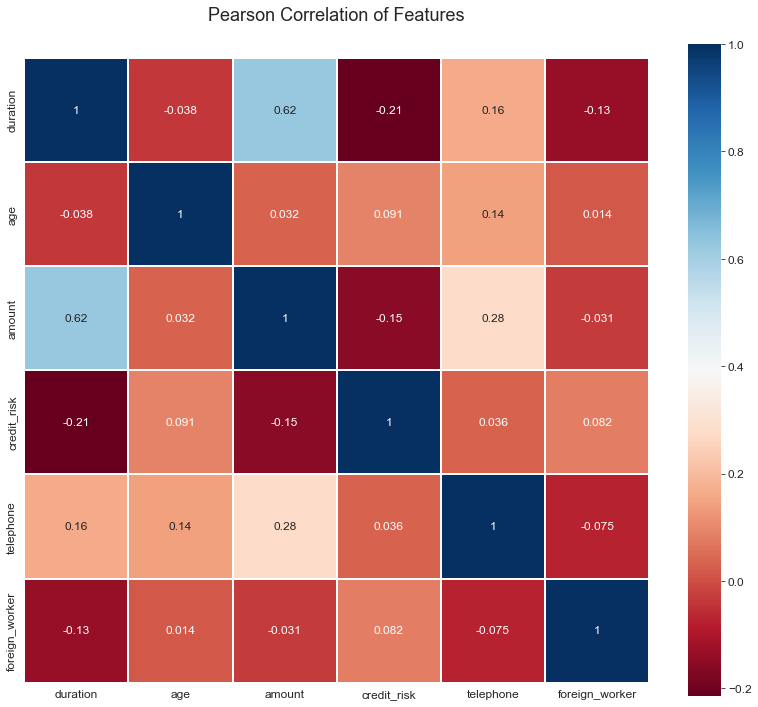

In [888]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(data[['duration', 'age', 'amount', 'credit_risk', 'telephone', 'foreign_worker']].corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [893]:
# new_data = data.drop(['duration', 'age'], axis=1)
# new_data['duration_age'] = data['duration'] * data['age']
new_data = data

In [894]:
X = new_data.drop(['credit_risk', 'installment_rate_code'], axis=1).values
y = new_data['credit_risk'].values
X = (X  - X.mean(axis=0)) / X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [892]:
knn = KNNClassifier(metric=pearson_similarity)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.744